In [237]:
%run "./myimports"

 Imported Modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.Max_Rows',None,'display.Max_columns',None)
'display.max_colwidth':6000
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100%;}</style>'))


In [186]:
import re
import pickle
from nltk import SnowballStemmer, word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from sklearn.utils import shuffle

''

In [110]:
good_text=pd.read_csv('./dataset/train/good.txt',sep='\t ',header=None)
bait_text=pd.read_fwf('./dataset/train/bait.txt',sep='\t', header=None)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [149]:
good_test_text=pd.read_csv('./dataset/test/good.txt',sep='\t ',header=None)
bait_test_text=pd.read_fwf('./dataset/test/bait.txt',sep='\t', header=None)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [150]:
good_test_text.head()

,0
0,Malda Municipal Corporation: TMC councillors to move no-confidence motion against own chairman
1,Roger Federer holds off Kei Nishikori to reach quarter-finals
2,The Guardian view on Trump and Israel: stick to the script | Editorial
3,Ryan Zinke confirmation hearing for interior secretary: the key points
4,Theresa May's Brexit speech: what the national newspapers say | Roy Greenslade


In [111]:
good_text.head()

,0
0,Five people injured in Manchester house explosion
1,"Barnaby Joyce spent $18,000 on 2013 travel to New England when trying to win seat"
2,HMRC criticised over spiralling payments to outsourcing firm
3,S Korea insists anti-Pyongyang propaganda will continue unless North apologizes for attacks
4,"A year after horrific fire, Kalbadevi set to give BJP another chance"


In [151]:
good_test_text.columns=['text']
good_test_text.head(2)

,text
0,Malda Municipal Corporation: TMC councillors to move no-confidence motion against own chairman
1,Roger Federer holds off Kei Nishikori to reach quarter-finals


In [112]:
good_text.columns=['text']
good_text.head(2)

,text
0,Five people injured in Manchester house explosion
1,"Barnaby Joyce spent $18,000 on 2013 travel to New England when trying to win seat"


In [113]:
good_text.shape

(4560, 1)

In [153]:
bait_test_text.head()

,0,1
0,12 Stories From Around The World That Show What Really Happened In 2016,NaN
1,Scandal: Senator Harry Reid Texted Illicit Photographs Of His Tail To A Female Intern,NaN
2,These Were Just Normal GIFs...And Then Michael Bay Got Involved. I Can't Stop Laughing.,NaN
3,These 14 Places Make Good Enough Hot Chocolate That You'd Be Willing To Travel For It,NaN
4,These Celebrity Impressions Are The Best Part About Christmas,NaN


In [114]:
bait_text.columns
# =['bait_text']
# bait_text=pd.DataFrame(bait_text[0], columns='bait_text')
# bait_text.head()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [154]:
bait_test_text.drop(columns=[1],axis=1,inplace=True)
bait_test_text.head(2)

,0
0,12 Stories From Around The World That Show What Really Happened In 2016
1,Scandal: Senator Harry Reid Texted Illicit Photographs Of His Tail To A Female Intern


In [115]:
bait_text.drop(columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],axis=1, inplace=True);
bait_text.head()

,0
0,What's Going On Around The World Today
1,This Might Be The Most Beautiful Video Shot With A GoPro...But It's Also Scary
2,19 Confessions Of Everyone Who Hates New Year's
3,7 Daredevil Dogs Who Are Unaware They Can Die
4,The 17 Emotions That Leonardo DiCaprio Felt When He Lost At The Oscars


In [155]:
bait_test_text.columns=['text']
bait_test_text.head(2)

,text
0,12 Stories From Around The World That Show What Really Happened In 2016
1,Scandal: Senator Harry Reid Texted Illicit Photographs Of His Tail To A Female Intern


In [116]:
bait_text.columns=['text']

In [117]:
bait_text.head()

,text
0,What's Going On Around The World Today
1,This Might Be The Most Beautiful Video Shot With A GoPro...But It's Also Scary
2,19 Confessions Of Everyone Who Hates New Year's
3,7 Daredevil Dogs Who Are Unaware They Can Die
4,The 17 Emotions That Leonardo DiCaprio Felt When He Lost At The Oscars


In [118]:
bait_text.shape

(4228, 1)

In [201]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [105]:
from tqdm import tqdm_notebook
import torch
import fastai
from fastai.text import *

In [156]:
bait_test_text['label']='clickbait'

In [158]:
bait_test_text.head(2)

,text,label
0,12 Stories From Around The World That Show What Really Happened In 2016,clickbait
1,Scandal: Senator Harry Reid Texted Illicit Photographs Of His Tail To A Female Intern,clickbait


In [120]:
bait_text['label']='clickbait'

In [121]:
bait_text.head()

,text,label
0,What's Going On Around The World Today,clickbait
1,This Might Be The Most Beautiful Video Shot With A GoPro...But It's Also Scary,clickbait
2,19 Confessions Of Everyone Who Hates New Year's,clickbait
3,7 Daredevil Dogs Who Are Unaware They Can Die,clickbait
4,The 17 Emotions That Leonardo DiCaprio Felt When He Lost At The Oscars,clickbait


In [159]:
good_test_text['label']='news'
good_test_text.head(2)

,text,label
0,Malda Municipal Corporation: TMC councillors to move no-confidence motion against own chairman,news
1,Roger Federer holds off Kei Nishikori to reach quarter-finals,news


In [122]:
good_text['label']='news'

In [123]:
good_text.head()

,text,label
0,Five people injured in Manchester house explosion,news
1,"Barnaby Joyce spent $18,000 on 2013 travel to New England when trying to win seat",news
2,HMRC criticised over spiralling payments to outsourcing firm,news
3,S Korea insists anti-Pyongyang propaganda will continue unless North apologizes for attacks,news
4,"A year after horrific fire, Kalbadevi set to give BJP another chance",news


In [189]:
shuffle(pd.concat([good_test_text['text'], bait_test_text['text']])).to_csv('test.csv', index=None, header=True)

In [190]:
# shuffle(pd.concat([good_test_text['text'], bait_test_text['text']])).to_csv('test.csv', index=None, header=True)
test_data=pd.read_csv('test.csv')
test_data.head()

,text
0,26 Long-Haired Hotties Who Will Hypnotize You With Their Luscious Locks
1,25 Amazing Hiking Spots You Have To Check Out
2,"US: One dead, multiple injured in San Antonio shopping mall shooting"
3,"8 Fun In The Sun Activities, Unless, God Forbid, You Didnt Pack The Sunscreen"
4,England opener Alex Hales to return home with hand injury


In [191]:
# test_data=shuffle(test_data)
# test_data.head()

In [192]:
shuffle(pd.concat([good_test_text, bait_test_text])).to_csv(
    'test_with_label.csv', index=None, header=True)

In [193]:
shuffle(pd.concat([good_text['text'], bait_text['text']])).to_csv(
    'unlabeled_news.csv', index=None, header=True)

In [194]:
unlabeled_news=pd.read_csv('unlabeled_news.csv')
unlabeled_news.head()

,text
0,India vs England: Teams stay back in Pune ahead of second ODI in Cuttack
1,These 19 Photos Might Be The Most Amazing Pics I've Ever Seen Of The Night Sky
2,"Wednesdays best TV: Hospital, No Offence, Film 2017"
3,Bao Bao The Panda Cub Spent The Night In A Tree After Getting Zapped By A Hot Wire
4,Jeremy Corbyn pledges to nationalise failing care homes amid NHS crisis - Politics live


In [195]:
shuffle(pd.concat([good_text[['text', 'label']],bait_text[['text', 'label']]])).to_csv(
    'train_all.csv', index=None, header=True)

In [196]:
train_all=pd.read_csv('train_all.csv')
train_all.head()

,text,label
0,Bangladesh collapse gives New Zealand chance at unlikely win,news
1,Inquiry into Big Bash TVs live tactical talk,news
2,People Really Think This &quot;Beauty And The Beast&quot; Doll Looks Like Justin Bieber,clickbait
3,The Bust Of Winston Churchill Is Back In The Oval Office,clickbait
4,24 Times Polar Bears Were The Party Animals Of The Animal Kingdom,clickbait


In [197]:
folder = '.'
unlabeled_file = 'unlabeled_news.csv'

In [198]:
# %%time
data_lm = TextLMDataBunch.from_csv(folder, unlabeled_file, text_cols='text')

In [199]:
# %%time
learn = language_model_learner(data_lm, drop_mult=0.3, arch=AWD_LSTM)

In [200]:
learn.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.24E-02
Min loss divided by 10: 3.55E-02


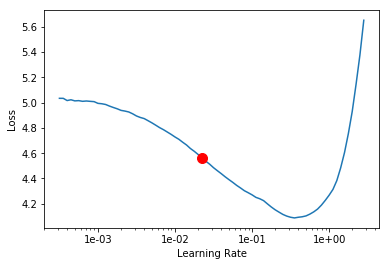

In [202]:
learn.recorder.plot(skip_end=10, suggestion=True)

In [203]:
best_lm_lr = learn.recorder.min_grad_lr
best_lm_lr

0.022387211385683385

In [204]:
learn.fit_one_cycle(1, best_lm_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.138159,3.498122,0.430035,05:18


In [205]:
learn.show_results()

text,target,pred
"xxbos 21 xxmaj things xxmaj kylie xxmaj jenner xxmaj like , xxmaj you xxmaj know , xxmaj xxunk xxmaj in","2016 xxbos xxmaj data xxunk law a xxunk stuff - up , says internet users group xxbos 21 xxmaj xxunk",xxmaj xxbos xxmaj xxunk xxmaj xxbos xxbos xxmaj xxbos xxbos xxmaj xxbos xxmaj xxmaj xxbos xxbos xxbos xxmaj xxmaj photos
list stars xxbos xxmaj these xxmaj paintings xxmaj were xxmaj all xxmaj done xxmaj in xxup one xxmaj brush xxmaj,stroke . xxmaj this xxmaj is xxmaj truly xxmaj mind xxmaj blowing xxbos xxmaj there 's a xxmaj fake xxmaj,xxunk xxmaj xxmaj but xxmaj is xxmaj the xxmaj beautiful xxmaj xxunk xxmaj xxmaj the 's xxmaj xxmaj xxunk xxmaj
in xxmaj reaction xxmaj to xxmaj her xxmaj golden xxmaj globe xxmaj xxunk xxbos xxmaj pep xxmaj guardiola blames bad,xxunk and not referee for draw with xxmaj tottenham xxbos xxmaj osama bin xxmaj laden xxunk xxmaj xxunk xxmaj gandhi,xxunk xxbos xxunk xxunk xxbos xxmaj xxbos xxmaj xxunk xxmaj xxmaj xxunk xxmaj xxmaj laden xxmaj xxbos xxunk xxmaj xxunk
15 xxmaj food xxmaj pics xxmaj that xxmaj may xxmaj give xxmaj you a xxmaj heart xxmaj attack xxmaj just,xxmaj from xxmaj looking xxbos xxmaj xxunk xxmaj swimming xxmaj and xxmaj xxunk xxmaj team xxmaj season xxmaj canceled xxmaj,xxmaj xxunk xxmaj the xxmaj xxmaj xxunk xxmaj xxunk xxmaj in xxmaj xxunk xxmaj xxunk xxmaj xxunk xxmaj xxunk xxmaj
"this xxmaj guy xxmaj xxunk xxmaj his xxmaj girlfriend xxmaj the xxmaj entire "" xxmaj bee xxmaj movie "" xxmaj",script xxmaj for xxmaj christmas xxbos xxmaj la xxunk xxunk xxunk xxunk xxunk xxunk xxbos xxmaj lives xxunk apart and,xxunk xxmaj xxunk xxmaj xxunk xxbos xxmaj xxunk xxmaj xxmaj xxbos xxbos xxbos xxbos xxbos xxmaj xxunk xxmaj xxmaj from


In [213]:
learn.unfreeze()

In [214]:
%%time
learn.fit_one_cycle(1, best_lm_lr)

epoch,train_loss,valid_loss,accuracy,time
0,3.611075,3.242975,0.456101,11:05


Wall time: 11min 5s


In [215]:
learn.predict('A person having trouble during the summer', n_words=200)

"A person having trouble during the summer sunday xxbos He 's Not Really Fat xxbos 9 Disturbing Facts You Are Too Incredibly Sorry xxbos while Pure Queer Bears And Hope We Question xxbos This New Month Is Just Amazing xxbos Yuvraj Singh ambernath where may do americas run to go to Australian Open but it will be of like - nice ! Wild Performance For The First Time camps xxbos 16 Old Immigrants Who Had So Many Workshop Musician on Books To Make The First Baby xxbos People Are Awesome Without Planned America xxbos What wait for hardest week live ? xxbos Why readers to become US blood watchdog xxbos Here 's What Kanye Say This Guy Fully Had The Most Amazing Route To Me 30 xxbos Colombia central plane aiims horrific file crew tells"

In [216]:
learn.save_encoder('clickbait_news_enc')

In [218]:
# learn.show_results()

In [221]:
train_file, test_file = 'train_all.csv', 'test.csv'

In [222]:
data_clas = TextClasDataBunch.from_csv(path=folder, 
                                        csv_name=train_file,
                                        test=test_file,
                                        vocab=data_lm.train_ds.vocab, 
                                        bs=64,
                                        text_cols='text', 
                                        label_cols='label')

In [223]:
data_clas.save('ulmfit_data_clas_clickbait_news')

In [224]:
learn_clas = text_classifier_learner(data_clas, drop_mult=0.3, arch=AWD_LSTM)
learn_clas.load_encoder('clickbait_news_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7030 items)
x: TextList
xxbos xxmaj tesla xxmaj cleared xxmaj in xxmaj fatal xxmaj xxunk xxmaj crash xxmaj investigation,xxbos xxmaj now xxmaj you xxmaj can xxmaj make xxmaj driving xxmaj more xxmaj fun xxmaj with xxmaj the xxmaj new xxmaj app xxunk,xxbos xxmaj do xxmaj you xxmaj know xxmaj what xxmaj happened xxmaj in xxmaj tech xxmaj at xxmaj the xxmaj end xxmaj of xxmaj november ?,xxbos xxup ndmc xxunk central xxmaj delhi hotel for price 15 times higher,xxbos xxup usa vs xxmaj portugal : xxmaj this xxmaj is xxmaj what xxmaj it xxmaj looks xxmaj like xxmaj to xxmaj see 300 xxmaj million xxmaj hearts xxmaj break in xxmaj one xxmaj second
y: CategoryList
clickbait,clickbait,clickbait,news,clickbait
Path: .;

Valid: LabelList (1758 items)
x: TextList
xxbos xxup eu citizens in the xxup uk : what did you make of xxmaj may 's xxmaj brexit speech ?,xxbos xxmaj chinese xxmaj state xxmaj media xxmaj keeps xxunk xxmaj donald xxmaj trump xxm

In [225]:
learn_clas.lr_find(start_lr=slice(10e-7, 10e-5), end_lr=slice(0.1, 10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [174]:
# learn_clas.recorder.plot()

Min numerical gradient: 3.16E-04
Min loss divided by 10: 8.91E-04


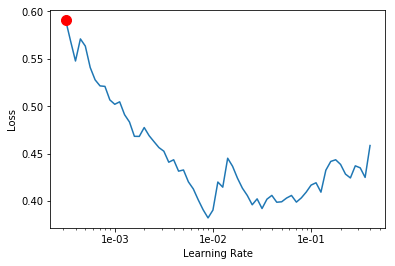

In [226]:
learn_clas.recorder.plot(skip_end=10, suggestion=True)

In [227]:
best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

0.000316227766016838

In [228]:
learn_clas.show_results()

text,target,prediction
"xxbos 7 xxmaj xxunk xxmaj that xxmaj will xxmaj get xxmaj you xxmaj through xxmaj the xxmaj day , xxmaj and , xxmaj we xxmaj like xxmaj to xxmaj think , xxmaj xxunk xxmaj xxunk xxmaj too xxmaj if xxmaj he xxmaj had xxmaj seen xxmaj them",clickbait,news
xxbos xxmaj people xxmaj are xxmaj making xxmaj music xxmaj videos xxmaj that xxmaj get xxmaj faster xxmaj every xxmaj time a xxmaj word xxmaj is xxmaj said xxmaj and xxmaj it 's xxmaj the xxmaj best xxmaj thing xxmaj ever,clickbait,news
"xxbos 17 xxmaj words xxmaj that xxmaj toddlers xxmaj screw xxmaj up . xxmaj if xxmaj your xxmaj baby xxmaj says "" xxmaj xxunk , "" xxmaj he xxmaj may xxmaj just xxmaj want a xxmaj xxunk xxmaj snack .",clickbait,news
"xxbos xxmaj the 15 xxmaj original xxmaj locations xxmaj of xxmaj popular xxmaj fast xxmaj food xxmaj xxunk . xxmaj wow , xxmaj these xxmaj look xxmaj way xxmaj different xxmaj than xxmaj what i 'm xxmaj used xxmaj to",clickbait,news
"xxbos xxmaj inspiring : xxmaj for xxmaj every xxmaj blimp xxmaj it xxmaj sells , xxmaj this xxmaj blimp xxmaj company xxmaj is xxmaj giving xxmaj away a xxmaj free xxmaj blimp xxmaj to xxmaj an xxmaj xxunk xxmaj child",clickbait,news


In [229]:
learn_clas.fit_one_cycle(1, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.360354,0.126329,0.994312,05:27


In [230]:
learn_clas.show_results()

text,target,prediction
"xxbos 7 xxmaj xxunk xxmaj that xxmaj will xxmaj get xxmaj you xxmaj through xxmaj the xxmaj day , xxmaj and , xxmaj we xxmaj like xxmaj to xxmaj think , xxmaj xxunk xxmaj xxunk xxmaj too xxmaj if xxmaj he xxmaj had xxmaj seen xxmaj them",clickbait,clickbait
xxbos xxmaj people xxmaj are xxmaj making xxmaj music xxmaj videos xxmaj that xxmaj get xxmaj faster xxmaj every xxmaj time a xxmaj word xxmaj is xxmaj said xxmaj and xxmaj it 's xxmaj the xxmaj best xxmaj thing xxmaj ever,clickbait,clickbait
"xxbos 17 xxmaj words xxmaj that xxmaj toddlers xxmaj screw xxmaj up . xxmaj if xxmaj your xxmaj baby xxmaj says "" xxmaj xxunk , "" xxmaj he xxmaj may xxmaj just xxmaj want a xxmaj xxunk xxmaj snack .",clickbait,clickbait
"xxbos xxmaj the 15 xxmaj original xxmaj locations xxmaj of xxmaj popular xxmaj fast xxmaj food xxmaj xxunk . xxmaj wow , xxmaj these xxmaj look xxmaj way xxmaj different xxmaj than xxmaj what i 'm xxmaj used xxmaj to",clickbait,clickbait
"xxbos xxmaj inspiring : xxmaj for xxmaj every xxmaj blimp xxmaj it xxmaj sells , xxmaj this xxmaj blimp xxmaj company xxmaj is xxmaj giving xxmaj away a xxmaj free xxmaj blimp xxmaj to xxmaj an xxmaj xxunk xxmaj child",clickbait,clickbait


In [231]:
learn_clas.freeze_to(-2)

In [232]:
learn_clas.fit_one_cycle(1, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.256093,0.052541,0.996018,07:03


In [233]:
learn_clas.show_results()

text,target,prediction
"xxbos 7 xxmaj xxunk xxmaj that xxmaj will xxmaj get xxmaj you xxmaj through xxmaj the xxmaj day , xxmaj and , xxmaj we xxmaj like xxmaj to xxmaj think , xxmaj xxunk xxmaj xxunk xxmaj too xxmaj if xxmaj he xxmaj had xxmaj seen xxmaj them",clickbait,clickbait
xxbos xxmaj people xxmaj are xxmaj making xxmaj music xxmaj videos xxmaj that xxmaj get xxmaj faster xxmaj every xxmaj time a xxmaj word xxmaj is xxmaj said xxmaj and xxmaj it 's xxmaj the xxmaj best xxmaj thing xxmaj ever,clickbait,clickbait
"xxbos 17 xxmaj words xxmaj that xxmaj toddlers xxmaj screw xxmaj up . xxmaj if xxmaj your xxmaj baby xxmaj says "" xxmaj xxunk , "" xxmaj he xxmaj may xxmaj just xxmaj want a xxmaj xxunk xxmaj snack .",clickbait,clickbait
"xxbos xxmaj the 15 xxmaj original xxmaj locations xxmaj of xxmaj popular xxmaj fast xxmaj food xxmaj xxunk . xxmaj wow , xxmaj these xxmaj look xxmaj way xxmaj different xxmaj than xxmaj what i 'm xxmaj used xxmaj to",clickbait,clickbait
"xxbos xxmaj inspiring : xxmaj for xxmaj every xxmaj blimp xxmaj it xxmaj sells , xxmaj this xxmaj blimp xxmaj company xxmaj is xxmaj giving xxmaj away a xxmaj free xxmaj blimp xxmaj to xxmaj an xxmaj xxunk xxmaj child",clickbait,clickbait


In [234]:
learn_clas.unfreeze()

In [235]:
learn_clas.fit_one_cycle(1, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.269414,0.039922,0.996587,13:51


In [236]:
learn_clas.show_results()

text,target,prediction
"xxbos 7 xxmaj xxunk xxmaj that xxmaj will xxmaj get xxmaj you xxmaj through xxmaj the xxmaj day , xxmaj and , xxmaj we xxmaj like xxmaj to xxmaj think , xxmaj xxunk xxmaj xxunk xxmaj too xxmaj if xxmaj he xxmaj had xxmaj seen xxmaj them",clickbait,clickbait
xxbos xxmaj people xxmaj are xxmaj making xxmaj music xxmaj videos xxmaj that xxmaj get xxmaj faster xxmaj every xxmaj time a xxmaj word xxmaj is xxmaj said xxmaj and xxmaj it 's xxmaj the xxmaj best xxmaj thing xxmaj ever,clickbait,clickbait
"xxbos 17 xxmaj words xxmaj that xxmaj toddlers xxmaj screw xxmaj up . xxmaj if xxmaj your xxmaj baby xxmaj says "" xxmaj xxunk , "" xxmaj he xxmaj may xxmaj just xxmaj want a xxmaj xxunk xxmaj snack .",clickbait,clickbait
"xxbos xxmaj the 15 xxmaj original xxmaj locations xxmaj of xxmaj popular xxmaj fast xxmaj food xxmaj xxunk . xxmaj wow , xxmaj these xxmaj look xxmaj way xxmaj different xxmaj than xxmaj what i 'm xxmaj used xxmaj to",clickbait,clickbait
"xxbos xxmaj inspiring : xxmaj for xxmaj every xxmaj blimp xxmaj it xxmaj sells , xxmaj this xxmaj blimp xxmaj company xxmaj is xxmaj giving xxmaj away a xxmaj free xxmaj blimp xxmaj to xxmaj an xxmaj xxunk xxmaj child",clickbait,clickbait


In [244]:
# test1=pd.read_csv('test_with_label.csv')
# data_clas.add_test(test1["text"])

In [245]:
test_preds, _ = learn_clas.get_preds(DatasetType.Test, 
                                     ordered=True)

In [256]:
for i in range(len(test_preds)):
    if(test_preds[i,0]>0.5):
        test1['predicted_result'][i]="clickbait"
    else :
        test1['predicted_result'][i]='news'

In [257]:
test1.head(50)

,text,label,predicted_result
0,17 Times Ali Wong Spoke Hilarious Truths About Adulthood,clickbait,clickbait
1,"Ward Watch: Congested roads, encroachment on mangrove land key problems in K West",news,news
2,Plan for world-class concert hall in City of London back on track,news,news
3,Photos Capture Panic And Chaos After Deadly Ft. Lauderdale Airport Shooting,clickbait,clickbait
4,Manchester United still making up for Louis vanGaals expensive lost time | Paul Wilson,news,news
5,7 Tailgating Superstitions Proven To Help Your Team Win,clickbait,clickbait
6,Man arrested from Kanpur for murder in Navi Mumbai mosque,news,news
7,New Years eve: Over 450 arrested in Kolkata,news,news
8,8 Kittens That God Forbid Could Be Used To Prop Up A Wobbly Table,clickbait,clickbait
9,Coalition 'cherry picking' data to support cashless welfare card trial,news,news


In [258]:
1/len(test1)*(test1['predicted_result']==test1['label']).sum()

0.9931717309662002

In [259]:
interp = ClassificationInterpretation.from_learner(learn_clas)

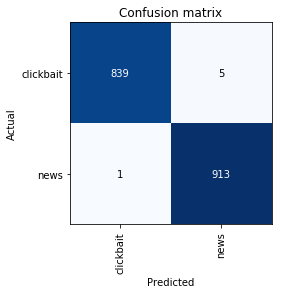

In [260]:
interp.plot_confusion_matrix()

In [264]:
test1.to_csv('label_and_predicted_result.csv')

In [265]:
learn_clas.save('final_model.pkl')

In [266]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)